This version of the example uses lmfit (https://lmfit.github.io/lmfit-py/) with an explicitly defined objective function

In [4]:
import numpy as np
from lmfit import minimize, Parameters
import matplotlib.pyplot as plt
from scipy.special import gammaln

In [5]:
# Generate example data according to an exponential PDF
np.random.seed(42)
lambda_=3.14159   # lambda is a keyword, so use lambda_ instead!
x_true = np.random.exponential(scale=lambda_, size=1000)

# Create histogram of the data
range=(0.0,4.0)
counts, bin_edges = np.histogram(x_true, bins=50, range=range, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
errs = np.sqrt(counts)

<ErrorbarContainer object of 3 artists>

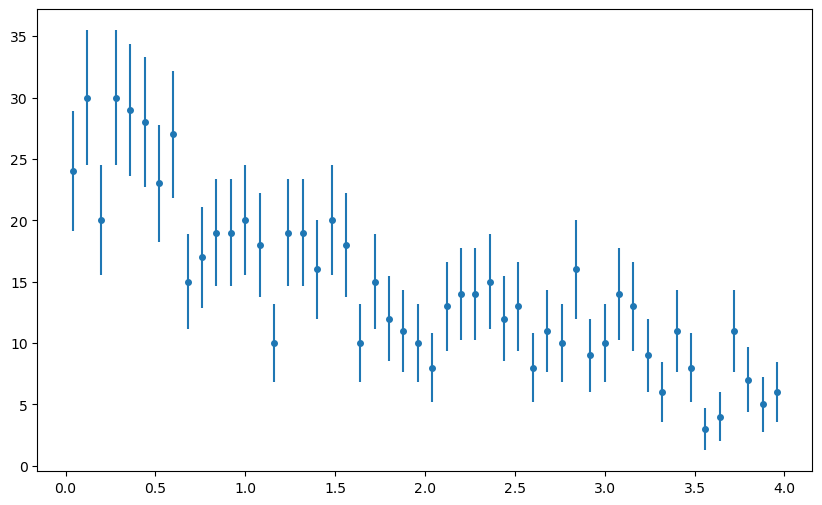

In [6]:
plt.figure(figsize=(10, 6))
plt.errorbar(bin_centers, counts, yerr=errs, fmt='o', label='Data', markersize=4)

In [7]:
# Define the model function
def expo(x, scale, lambda_):
    return scale * np.exp(-x/lambda_)

# Define the objective function to minimize (chi-square)
# returns the 'residual array'
def objective(params, x, data, errs):
    scale = params['scale']
    lambda_ = params['lambda_']
    
    model = expo(x, scale, lambda_)

    #used chatGPT to aid in remembering the nll function
    nll = np.sum(model - data *np.log(model) +gammaln(data+1))
    return nll


# Set up parameters with initial guesses
params = Parameters()
params.add('scale', value=np.max(counts))
params.add('lambda_', value=2)

Check our guess for the starting parameter values

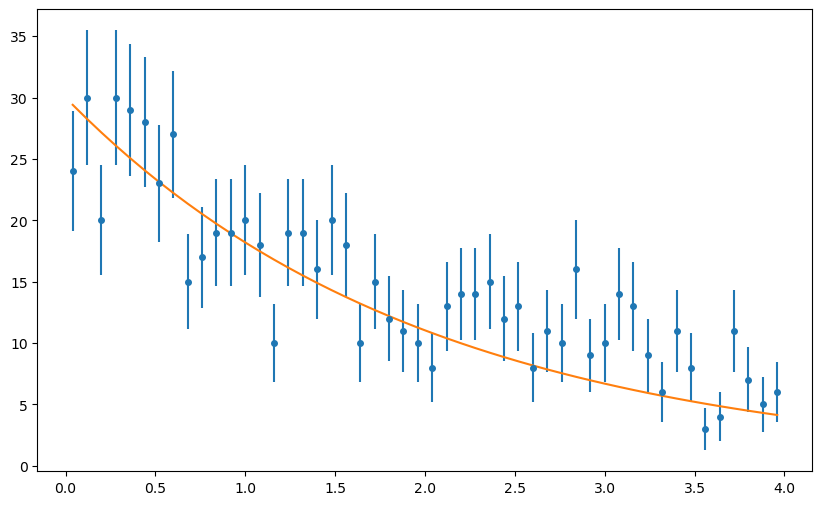

In [8]:
plt.figure(figsize=(10, 6))
plt.errorbar(bin_centers, counts, yerr=errs, fmt='o', label='Data', markersize=4)
plt.plot(bin_centers,expo(bin_centers,params['scale'].value,params['lambda_'].value))

The initial guess for the paraemter values looks pretty good.  Therfore the minimzer should be able to converge to a good minimum.

In [10]:
# Perform the fit

#nelder from chatGPT to fix an error
result = minimize(objective, params, args=(bin_centers, counts, errs), method='nelder')

In [11]:
result.chisqr

np.float64(17091.967051318396)


Fit Results:


TypeError: unsupported format string passed to NoneType.__format__

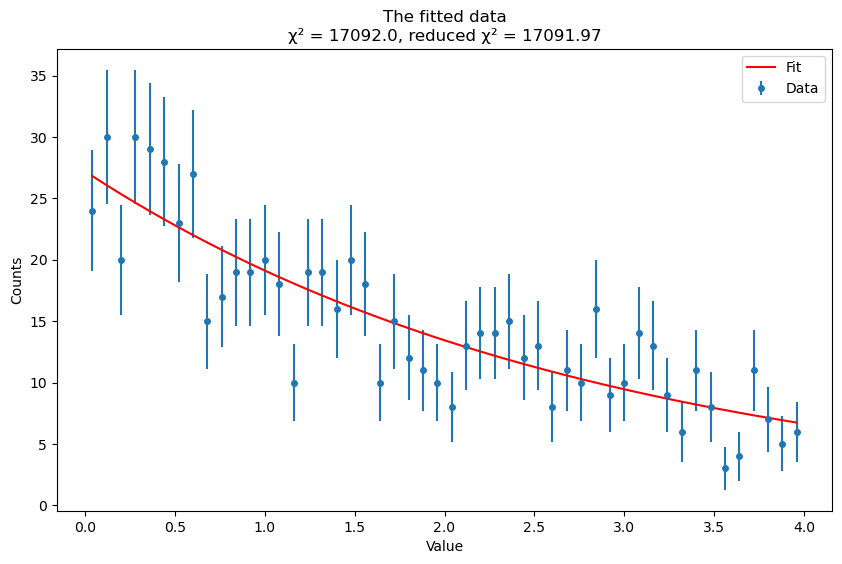

In [12]:
# Calculate the best fit curve
best_fit = expo(bin_centers, result.params['scale'].value, result.params['lambda_'].value)

# get the chi-square and reduced chi-square
chisq = result.chisqr
red_chisq = result.redchi
nDOF = result.nfree

# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(bin_centers, counts, yerr=np.sqrt(counts), 
             fmt='o', label='Data', markersize=4)
plt.plot(bin_centers, best_fit, 'r-', label='Fit')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.legend()
plt.title('The fitted data\n' + 
          f'χ² = {chisq:.1f}, reduced χ² = {red_chisq:.2f}')

# Print fit results
print('\nFit Results:')
for name, param in result.params.items():
    print(f'{name}: {param.value:.3f} ± {param.stderr:.3f}')
print(f'\nchi-square: {chisq:.1f}')
print(f'reduced chi-square: {red_chisq:.2f}')
print(f'degrees of freedom: {nDOF}')

plt.show()

In [20]:
# using the internal fit report
from lmfit import fit_report
print(fit_report(result))

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 80
    # data points      = 1
    # variables        = 2
    chi-square         = 17091.9671
    reduced chi-square = 17091.9671
    Akaike info crit   = 13.7463639
    Bayesian info crit = 9.74636387
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    scale:    27.1983689 (init = 30)
    lambda_:  2.83698551 (init = 2)
